In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import re

In [22]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
# print 생략 없이 출력
np.set_printoptions(threshold=sys.maxsize)

In [23]:
train = pd.read_csv("/data/ephemeral/home/level2_klue/KSY/data/train.csv")
back = pd.read_csv("/data/ephemeral/home/level2_klue/KSY/data/back.csv")

# Data Preprocessing

## Back

In [24]:
back['subject exist'] = back['sentence'].apply(lambda x: True if 'sub' in x.lower() else False)
back['object exist'] = back['sentence'].apply(lambda x: True if 'ob' in x.lower() else False)

In [25]:
back = back[back['subject exist'] & back['object exist']]

In [26]:
def replace_sub_obj(x):
    pattern1 = re.compile(r'[(\[]?sub[)\]]?', re.IGNORECASE)
    pattern2 = re.compile(r'[(\[]?obj[)\]]?', re.IGNORECASE)

    result = pattern1.sub(x.subject_word, x.sentence)
    result = pattern2.sub(x.object_word, result)
    return result

back['sentence'] = back.apply(replace_sub_obj,axis=1)
back['sentence'][:50]

0     Something은 1969 년 앨범 Abbey Road에서 조지 해리슨와 비틀즈가...
1     Barun Future Party · Honam을 기반으로하는 Barun Futur...
2     K- 리그 2에서 1 위를 차지한 광주FC는 26 일 한국프로축구연맹의 인정 및 마...
3     Uniform Family Life Store 아성다이소 (CEO 박정부)는 10 ...
4     1967 번호는 No. 1 Professional Baseball Draft로 요미...
5     : UN, European Parliament, 북대서양 조약 기구 (NATO), ...
7     박용오 (朴 ((旿, 1937년 4월 29일 (3 월 19 일) (2009 년 11...
8     중국군과 싸울 수있을 정도로 약해진 국민당은 수도를 타이베이로 옮기기로 결정했으며 ...
12    2009 년 9 월, 미국 프로 야구 필라델피아 필리스 박찬호의 야구 선수는 MBC...
13    뉴질랜드 제 1 산업 부서의 생물 보안 대변인 대변인 인 캐서린 박사는 과일 파리를...
14    Joto di Bundon, Masacho, Pierrodela Francesca,...
15    더불어민주당 Lee Sang -min, Daejeon Metropolitan Cit...
17    제2총군는 태평양 전쟁이 끝날 때 일본 본토에 착륙하기 위해 연합군과 싸우기 위해 ...
21    2010 년에 그는 최초의 아시아 가수를위한 Michael Jackson의 첫 번째...
22    박흥식는 첫 번째 아내 사이에 장녀 Park Byung -Sook을 가지고 있으며,...
24    FA와 함께 가족 팀으로 돌아온 Lee Taek -Geun과 함께 그는 박병호와 함...
26    주요 가족은 돼지 산업을 운영하고 있었고 닛폰햄 소유자 오코소 요시노리도 가족과 할...
27    1824 년 첫 졸업은 제임스 먼로, 존 C. 칼훈, Henry Clay S

In [27]:
train.shape, back.shape

((32470, 6), (21629, 16))

In [28]:
print(train.columns)
print(back.iloc[:,:-2].columns)
back = back.iloc[:,:-2]

Index(['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'], dtype='object')
Index(['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source',
       'subject_word', 'subject_start_idx', 'subject_end_idx', 'subject_type',
       'object_word', 'object_start_idx', 'object_end_idx', 'object_type'],
      dtype='object')


## train

In [29]:
def seperate(x):
    entity_dict = eval(x)
    return entity_dict['word'].strip(),int(entity_dict['start_idx']),int(entity_dict['end_idx']),entity_dict['type'].strip()

In [30]:
train['subject_word'], train['subject_start_idx'], train['subject_end_idx'], train['subject_type'] = zip(*train['subject_entity'].apply(seperate))
train['object_word'], train['object_start_idx'], train['object_end_idx'], train['object_type'] = zip(*train['object_entity'].apply(seperate))

## back and train

In [31]:
def category(x):
    temp = x.split(':')
    if len(temp) == 1:
        return 'no'
    return temp[0]

train['label category'] = train['label'].apply(category)
back['label category'] = back['label'].apply(category)
train.head()

,id,sentence,subject_entity,object_entity,label,source,subject_word,subject_start_idx,subject_end_idx,subject_type,object_word,object_start_idx,object_end_idx,object_type,label category
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,비틀즈,24,26,ORG,조지 해리슨,13,18,PER,no
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,민주평화당,19,23,ORG,대안신당,14,17,ORG,no
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,광주FC,21,24,ORG,한국프로축구연맹,34,41,ORG,org
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,아성다이소,13,17,ORG,박정부,22,24,PER,org
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,요미우리 자이언츠,22,30,ORG,1967,0,3,DAT,no


# EDA

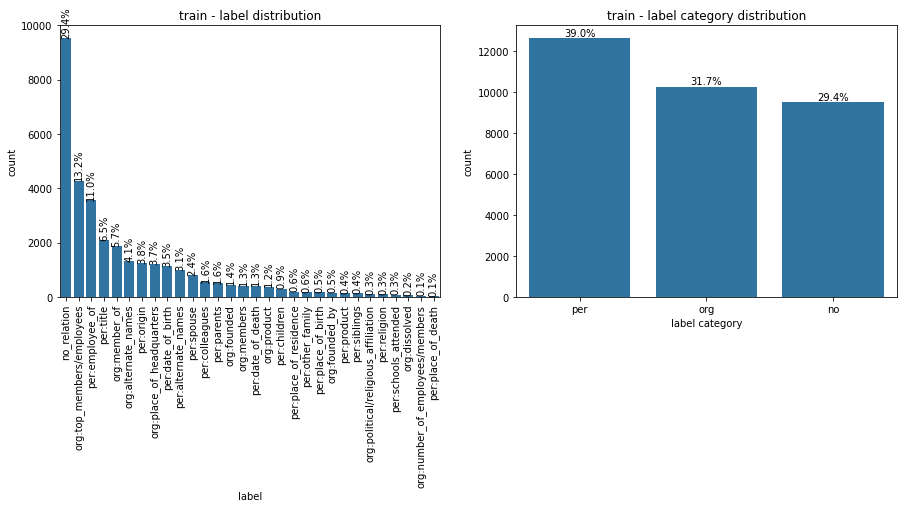

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=train, x="label", ax=ax[0], order=train['label'].value_counts().index)
sns.countplot(data=train, x="label category", ax=ax[1], order=train['label category'].value_counts().index)

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%',rotation=90)
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%')

ax[0].set_title("train - label distribution")
ax[1].set_title("train - label category distribution")

ax[0].tick_params(axis='x',rotation=90)
plt.show()

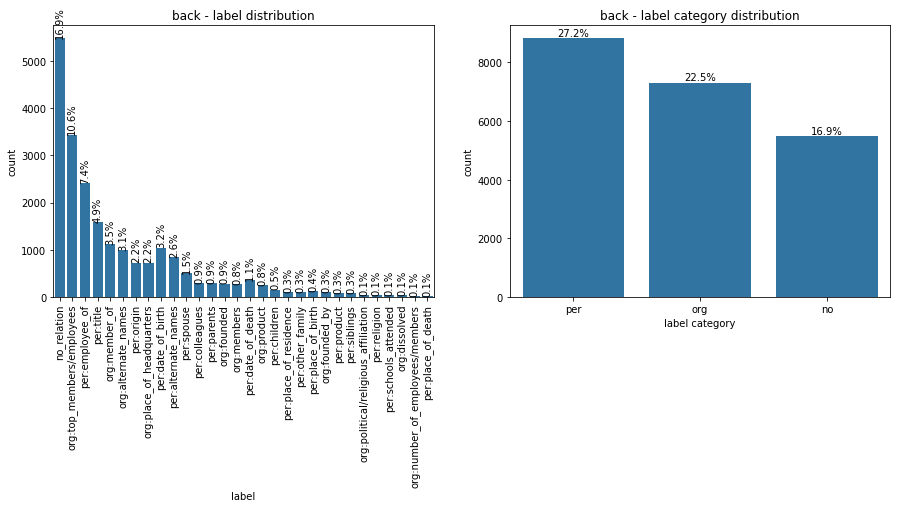

In [33]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=back, x="label", ax=ax[0], order=train['label'].value_counts().index)
sns.countplot(data=back, x="label category", ax=ax[1], order=train['label category'].value_counts().index)

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%',rotation=90)
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%')

ax[0].set_title("back - label distribution")
ax[1].set_title("back - label category distribution")

ax[0].tick_params(axis='x',rotation=90)
plt.show()

In [34]:
train_vc = train['label'].value_counts()*100/len(train['label'])
train_vc

label
no_relation                            29.362488
org:top_members/employees              13.193717
per:employee_of                        11.004004
per:title                               6.476748
org:member_of                           5.746843
org:alternate_names                     4.065291
per:origin                              3.800431
org:place_of_headquarters               3.680320
per:date_of_birth                       3.480136
per:alternate_names                     3.082846
per:spouse                              2.448414
per:colleagues                          1.644595
per:parents                             1.601478
org:founded                             1.385895
org:members                             1.293502
per:date_of_death                       1.287342
org:product                             1.170311
per:children                            0.936249
per:place_of_residence                  0.594395
per:other_family                        0.585156
per:place_of_b

In [35]:
# 문장부호를 무시하고, '다'로 끝나지 않는 문장들
back_filtered = back[back['sentence'].str.contains(r'다([\.|\"|\'\s|\!|\?]*)$', regex=True)]
back_filtered.shape

<ipython-input-35-a1b13ab7d7a2>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  back_filtered = back[back['sentence'].str.contains(r'다([\.|\"|\'\s|\!|\?]*)$', regex=True)]


(19703, 15)

### 실험

In [16]:
# 문장부호를 무시하고, '다'로 끝나지 않는 문장들
back_filtered_oh = back[back['sentence'].str.contains(r'오([\.|\"|\'\s|\!|\?]*)$', regex=True)]
back_filtered_oh.shape

<ipython-input-16-e1c6b50eb14d>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  back_filtered_oh = back[back['sentence'].str.contains(r'오([\.|\"|\'\s|\!|\?]*)$', regex=True)]


(51, 15)

In [17]:
back_filtered_oh.sentence.to_list()

['17 일, 카르나는 아르주나와 싸웠고, 결투 중에 카르나의 탱크 휠이 진흙에 갇히고 카르나에서 아르주나가 바퀴가 진흙에서 떨어질 때까지 싸워야했습니다.전쟁의 규칙에 따르면, 그는 멈추라 고 간청했지만, 크리슈나"카르나의 목을 쏘십시오.',
 '고흥군 (Military 송귀근)는 공공 서비스 유형, 사교 서비스 유형 및 시장 유형의 세 가지 유형에서 가장 큰 2,726 명의 노인을위한 노인 및 사회 활동을 지원합니다.사업을 본격적으로 홍보하십시오.',
 '삼성 전자의 스폰서없이 거의 개최 된 2009 년 리그 컵 토너먼트는 많은 비틀기와 회전이 끝날 때 피스컵 조직위원회 (선문평화축구재단)와 새로운 후원을 할 수있었습니다.새 이름을 시작하십시오.',
 "김인규는“하이트진로의 작은 성실성은 사람들의 삶과 안전에 전념 한 자랑스러운 소방관의 아이들에게 조금 더해지기 위해 자리를 잡았습니다.”우리는 다양한 지원을 지원하여 가능합니다.소방관을 강력하게 지원하십시오.'",
 '윤관석 더불어민주당에 확신이 있다면 내부 고발자로 나오십시오.',
 "지드래곤는 기자 회견에서 'Peace Minus One', '권지용와 지드래곤라는 애착을 보여 주었다. 나는 내 음악을 즐기는 것처럼 열심히 노력하고 싶다. 전시회를 즐기십시오.'",
 '자세한 내용은 경기도경제과학진흥원 창업지원팀 (031-888-8601~8602) 또는 Gyeonggi-Do Environmental Team (031-8030-4273)으로 문의하십시오.',
 '화순열린도서관 월 1 일 수업에 대한 자세한 내용은 화순열린도서관 Nuri House (화순군 Library Team (061-379-3956) (061-379-3956)에 문의하십시오.',
 "Ocean은 비프리 (B-Free) 'u at!하이라이트 레코드에서 뮤지션과 꾸준히 교환 한 후 레코드를 강조하십시오.",
 '그러나 MBC의 경우, 문화방송 Union Strike의 여파로 일반적인 비상 스페셜 브로드 캐스트 (Breaking News)없이 

In [18]:
# 문장부호를 무시하고, '다'로 끝나지 않는 문장들
back_filtered = back[back['sentence'].str.contains(r'[다|오]([\.|\"|\'\s|\!|\?]*)$', regex=True)]
back_filtered.shape

<ipython-input-18-b7d48dc1fe57>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  back_filtered = back[back['sentence'].str.contains(r'[다|오]([\.|\"|\'\s|\!|\?]*)$', regex=True)]


(19754, 15)

In [19]:
# 문장부호를 무시하고, '다'로 끝나지 않는 문장들
train_filtered = train[train['sentence'].str.contains(r'오([\.|\"|\'\s|\!|\?]*)$', regex=True)]
train_filtered.shape

<ipython-input-19-d4a6f7bf3677>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  train_filtered = train[train['sentence'].str.contains(r'오([\.|\"|\'\s|\!|\?]*)$', regex=True)]


(0, 15)

In [20]:
back_filtered_ids = back_filtered.id.to_list()
back_not_filtered = back[~back['id'].isin(back_filtered_ids)]
back_not_filtered = back_not_filtered[~back['id'].isin(back_filtered_ids) & back_not_filtered['label'].isin(add_label)]

back_not_filtered.shape

NameError: name 'add_label' is not defined

In [116]:
back_not_filtered['sentence'].to_list()

[': UN, European Parliament, 북대서양 조약 기구 (NATO), 국제 이민기구, 세계 보건기구 (WHO), 지중해 연합, 이슬람 협력기구, 유럽 안보 협력기구, 국제 통화 기금, 세계 무역기구 및 프랑 코르 파니.',
 '디에고 베날리오는 현재 국가 대표팀의 주요 게임 골키퍼을 담당하고 있으며 Basel의 Janzo는 백업을 위해 경쟁하고 있습니다 골키퍼.',
 '첼리스트 정명화, 바이올리니스트 정두 -하우의 남동생.',
 '1904년 7월 1일ect], "툰-운트 스포트버라인 바이어 04 레버쿠젠"(체조 및 플레이 클럽 바이어 04 레버 쿠센).',
 '독립운동가의 거리에 설치된 조각품의 주인공은 Chungcheongnam -Do 공개 선발위원회를 위해 Kim Jak -Jin 장군, Yoo Kwan -Suon, Yun Bong -Gil, Lee Dong을 포함하여 총 5 명으로 선정되었습니다.-nyeong 및 한용운.',
 '"회사의 보수적 인 지침을 언급하면 올해 1 조의 매출이 가장 낮습니다."삼성전자 \'DRAM 확장, NAND 확장 및 LSI 확장은 Winik의 수익 성장을 이끌어 낼 것입니다.ips. "',
 '신의손 (申 ((, 1960년 1월 12일)는 러시아 한국 축구 선수이며, 원래 이름은 Valeriy Konstatinovich Sarychev 출신이며 소비에트 Tajik 소비에트 사회주의 공화국 인 Dushanbe 출신입니다 (현재 Tajikistan).',
 '일본이 문을 열면서 Edo Shogunate (히코네 번)의 Edo Shogunate 이이 나오스케 (히코네 번))는 5 개국 (미국, 네덜란드, 러시아, 영국, 프랑스)이있는 5 개국 조약입니다.고메이 황제 황제.',
 '12 월 8 일, 벨로루시 서부의 비 와비 숲에서 3 개의 러시아 공화국, 우크라이나, 벨로루시의 정상 회담이 비밀리에 만났고, 소비에트 연방은 더 이상 더 이상 독립국가연합 (CIS)를 선언하지 않았다.받기로 동의 한 벨라 베 조약.',


### 실험 끝

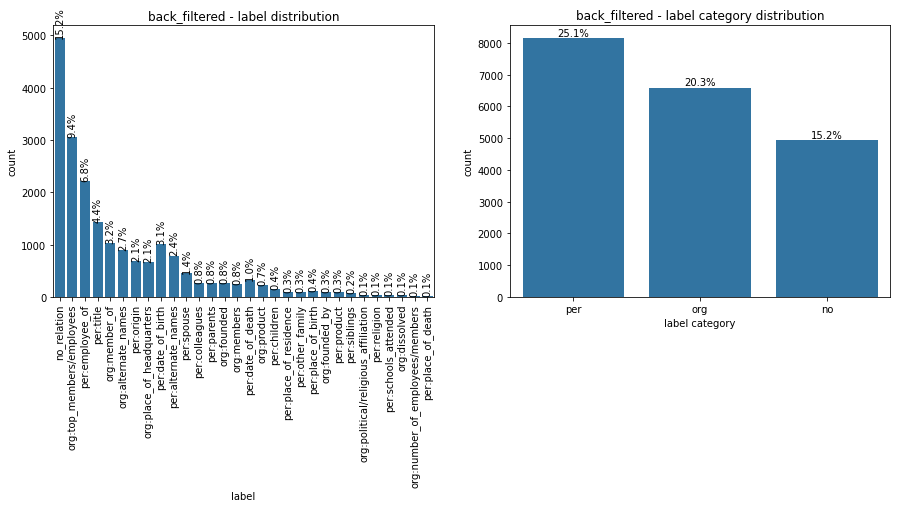

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=back_filtered, x="label", ax=ax[0], order=train['label'].value_counts().index)
sns.countplot(data=back_filtered, x="label category", ax=ax[1], order=train['label category'].value_counts().index)

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%',rotation=90)
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%')

ax[0].set_title("back_filtered - label distribution")
ax[1].set_title("back_filtered - label category distribution")

ax[0].tick_params(axis='x',rotation=90)
plt.show()

In [37]:
add_label1 = train_vc.index[3:]
add_label2 = train_vc.index[11:]
add_label3 = train_vc.index[17:]
print(add_label1)
print(add_label2)
print(add_label3)

Index(['per:title', 'org:member_of', 'org:alternate_names', 'per:origin',
       'org:place_of_headquarters', 'per:date_of_birth', 'per:alternate_names',
       'per:spouse', 'per:colleagues', 'per:parents', 'org:founded',
       'org:members', 'per:date_of_death', 'org:product', 'per:children',
       'per:place_of_residence', 'per:other_family', 'per:place_of_birth',
       'org:founded_by', 'per:product', 'per:siblings',
       'org:political/religious_affiliation', 'per:religion',
       'per:schools_attended', 'org:dissolved',
       'org:number_of_employees/members', 'per:place_of_death'],
      dtype='object', name='label')
Index(['per:colleagues', 'per:parents', 'org:founded', 'org:members',
       'per:date_of_death', 'org:product', 'per:children',
       'per:place_of_residence', 'per:other_family', 'per:place_of_birth',
       'org:founded_by', 'per:product', 'per:siblings',
       'org:political/religious_affiliation', 'per:religion',
       'per:schools_attended', 'org:dis

In [38]:
back_add1 = back_filtered[back_filtered['label'].isin(add_label1)]
back_add2 = back_filtered[back_filtered['label'].isin(add_label2)]
back_add3 = back_filtered[back_filtered['label'].isin(add_label3)]

In [39]:
train_back0 = pd.concat([train,back_filtered])
train_back1 = pd.concat([train,back_add1])
train_back2 = pd.concat([train,back_add2])
train_back3 = pd.concat([train,back_add3])
train_back1.shape,train_back2.shape,train_back3.shape

((41952, 15), (34998, 15), (33390, 15))

In [40]:
train_back_vc1 = train_back1['label'].value_counts()*100/len(train_back1['label'])
train_back_vc2 = train_back2['label'].value_counts()*100/len(train_back2['label'])
train_back_vc3 = train_back3['label'].value_counts()*100/len(train_back3['label'])
# train_back_vc1,train_back_vc2,train_back_vc3,train_back_vc4

In [41]:
pd.concat([train_vc,train_back_vc1,train_back_vc2,train_back_vc3],axis=1)

,count,count,count,count
label,,,,
no_relation,29.362488,22.725973,27.241557,28.553459
org:top_members/employees,13.193717,10.211670,12.240699,12.830189
per:employee_of,11.004004,8.516876,10.209155,10.700809
per:title,6.476748,8.404844,6.008915,6.298293
org:member_of,5.746843,6.893593,5.331733,5.588500
org:alternate_names,4.065291,5.272693,3.771644,3.953279
per:origin,3.800431,4.559973,3.525916,3.695717
org:place_of_headquarters,3.680320,4.443173,3.414481,3.578916
per:date_of_birth,3.480136,5.120137,3.228756,3.384247


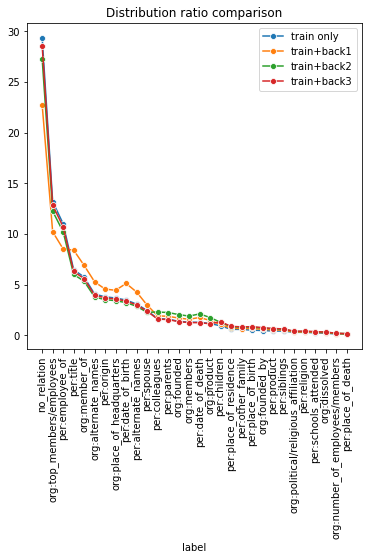

In [42]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.lineplot(x=train_vc.index,y=train_vc.values, marker='o',label='train only')
sns.lineplot(x=train_back_vc1.index,y=train_back_vc1.values, marker='o',label='train+back1')
sns.lineplot(x=train_back_vc2.index,y=train_back_vc2.values, marker='o',label='train+back2')
sns.lineplot(x=train_back_vc3.index,y=train_back_vc3.values, marker='o',label='train+back3')

ax.tick_params(axis='x',rotation=90)
ax.legend()
ax.set_title('Distribution ratio comparison')

plt.show()

In [43]:
train_back0.to_csv('./data/train_back1.csv')
train_back1.to_csv('./data/train_back2.csv')
train_back2.to_csv('./data/train_back3.csv')
train_back3.to_csv('./data/train_back4.csv')
